# Classification with Support Vector Machines

### Imports

In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Load Data

In [10]:
df = pd.read_csv('../../data/01-modified-data/occupations_detailed_(employment_and_wage).csv')

## drop unneeded column created from read_csv
df = df.iloc[:, 1:]

### Separate Predictor and Response Variables

In [11]:
# Y="Target" COLUMN and X="everything else"
X = df.iloc[:, 2:6]
Y = df.iloc[:, 7]

### Normalization

In [12]:
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))

### Numerical EDA

In [ ]:
df['Target'].value_counts(ascending=True)

In [ ]:
corr = X.corr()
print(corr)	

### Correlation Matrix Heatmap

In [ ]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

### Multivariable Pair Plot

In [ ]:
sns.pairplot(df.iloc[:, 2:7], hue='Target')
plt.show()

### Baseline: Random Classifier

In [ ]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(Y)


### Split Data

In [13]:
X.drop(columns=['EMP_PRSE'], inplace=True)

In [6]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=0, stratify=Y)

In [7]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (1115, 3)
<class 'pandas.core.series.Series'> (1115,)
<class 'pandas.core.frame.DataFrame'> (279, 3)
<class 'pandas.core.series.Series'> (279,)


In [65]:
accuracy_training_l = []
accuracy_test_l = []

### Train Linear Kernel

In [66]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model = model.fit(x_train, y_train)

### Check the Results

In [67]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

In [19]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING------
ACCURACY: 0.2538116591928251
RECALL: 0.2538116591928251
PRECISION: 0.21820229618671153


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


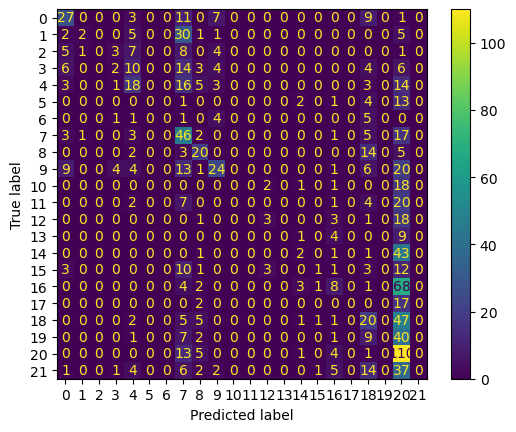

------TEST------
ACCURACY: 0.25448028673835127
RECALL: 0.25448028673835127
PRECISION: 0.21015344302708525


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


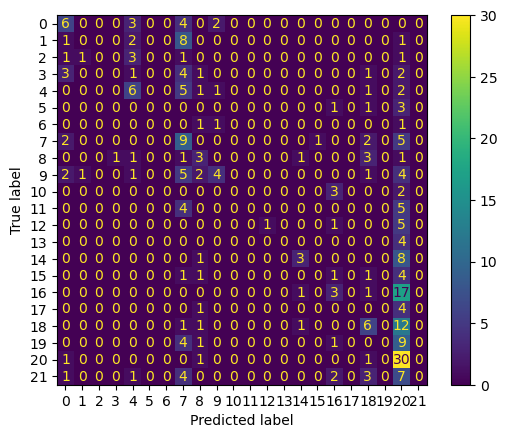

In [20]:
print("------TRAINING (Linear)------")
confusion_plot(y_train,yp_train)
print("------TEST (Linear)------")
confusion_plot(y_test,yp_test)

### Train Gaussian Kernel

In [68]:
model = SVC(kernel='rbf')
model = model.fit(x_train, y_train)

### Check the Results

In [69]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Gaussian)------
ACCURACY: 0.29237668161434976
RECALL: 0.29237668161434976
PRECISION: 0.3188086916969461


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


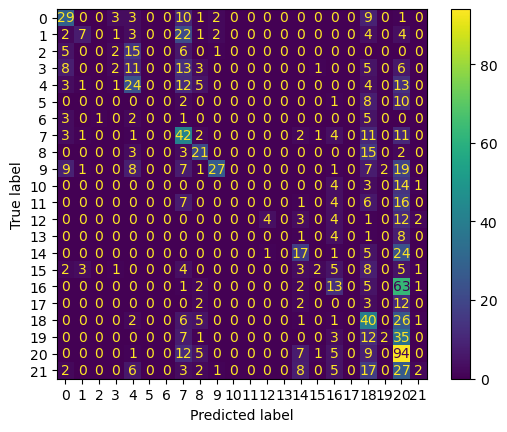

------TEST (Gaussian)------
ACCURACY: 0.2903225806451613
RECALL: 0.2903225806451613
PRECISION: 0.2952726782684026


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


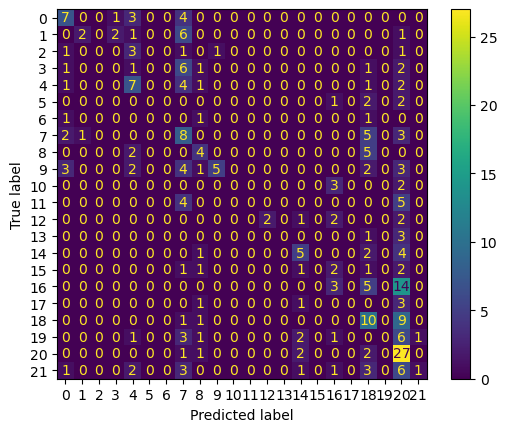

In [23]:
print("------TRAINING (Gaussian)------")
confusion_plot(y_train,yp_train)
print("------TEST (Gaussian)------")
confusion_plot(y_test,yp_test)

### Train Sigmoid Kernel

In [71]:
model = SVC(kernel='sigmoid')
model = model.fit(x_train, y_train)

### Check the Results

In [72]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.17309417040358743
RECALL: 0.17309417040358743
PRECISION: 0.1831206213512683


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


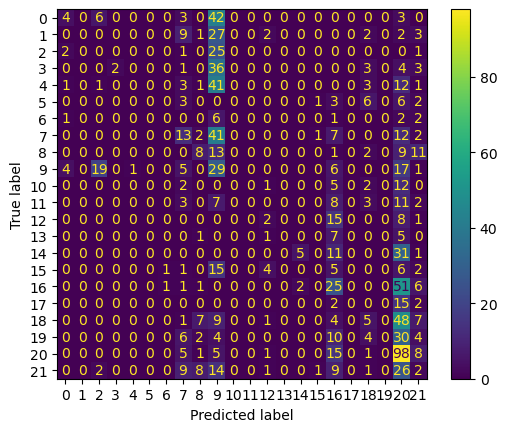

------TEST (Sigmoid)------
ACCURACY: 0.16487455197132617
RECALL: 0.16487455197132617
PRECISION: 0.17385219320703194


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


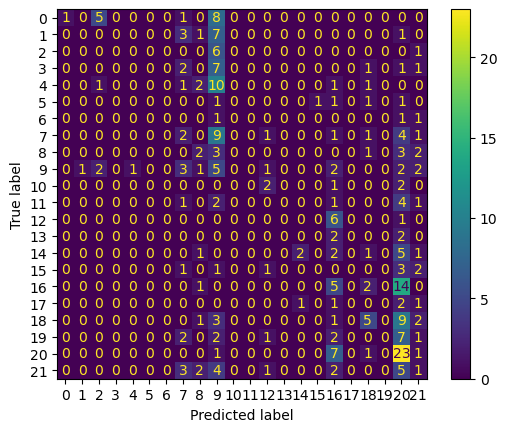

In [26]:
print("------TRAINING (Sigmoid)------")
confusion_plot(y_train,yp_train)
print("------TEST (Sigmoid)------")
confusion_plot(y_test,yp_test)

### Polynomial Kernel Hyperparameter Tuning

degree :  training acc , test acc
1 :  0.24753363228699551 , 0.23655913978494625
degree :  training acc , test acc
2 :  0.21973094170403587 , 0.2114695340501792
degree :  training acc , test acc
3 :  0.2062780269058296 , 0.1863799283154122
degree :  training acc , test acc
4 :  0.20358744394618833 , 0.1935483870967742
degree :  training acc , test acc
5 :  0.21255605381165918 , 0.18996415770609318
degree :  training acc , test acc
6 :  0.22331838565022422 , 0.1827956989247312
degree :  training acc , test acc
7 :  0.2242152466367713 , 0.1863799283154122
degree :  training acc , test acc
8 :  0.2304932735426009 , 0.1827956989247312
degree :  training acc , test acc
9 :  0.23139013452914797 , 0.1827956989247312
degree :  training acc , test acc
10 :  0.23318385650224216 , 0.1827956989247312


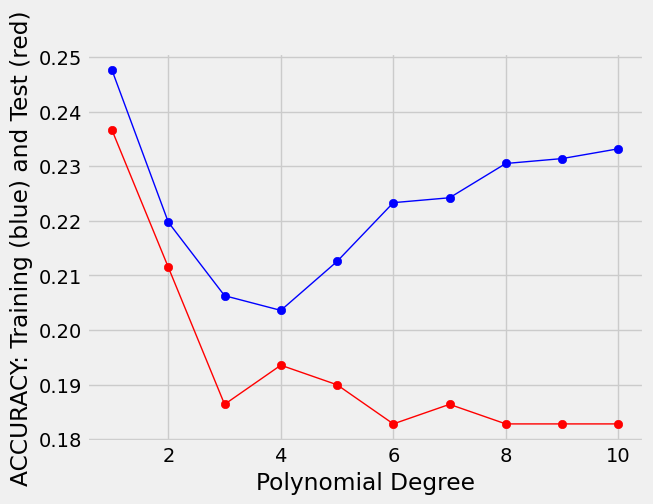

In [49]:
accuracies_train = []
accuracies_test = []
numbers = range(1, 11)

for i in numbers:
    model = SVC(kernel='poly', degree = i)
    model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    
    cm_train = confusion_matrix(y_train, yp_train)
    ac_train = accuracy_score(y_train, yp_train)
    
    cm_test = confusion_matrix(y_test, yp_test)
    ac_test = accuracy_score(y_test, yp_test)
    
    print('degree', ': ', 'training acc' , ',', 'test acc')
    print(i, ": ", ac_train, ',', ac_test)
    
    accuracies_train.append(ac_train)
    accuracies_test.append(ac_test)
    
plt.plot(numbers, accuracies_train, linewidth=1, color='b')
plt.scatter(numbers, accuracies_train, c='b')
plt.plot(numbers, accuracies_test, linewidth=1, color='r')
plt.scatter(numbers, accuracies_test, c='r')
plt.xlabel("Polynomial Degree")
plt.ylabel("ACCURACY: Training (blue) and Test (red)")
plt.style.use('fivethirtyeight')
plt.show();

plt.style.use('default')


### Train Polynomial Kernel

In [73]:
model = SVC(kernel = 'poly', degree = 1)
model = model.fit(x_train, y_train)

### Check the Results

In [74]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

accuracy_training_l.append(accuracy_score(y_train, yp_train))
accuracy_test_l.append(accuracy_score(y_test, yp_test))

------TRAINING (Sigmoid)------
ACCURACY: 0.23318385650224216
RECALL: 0.23318385650224216
PRECISION: 0.7560048472772009


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


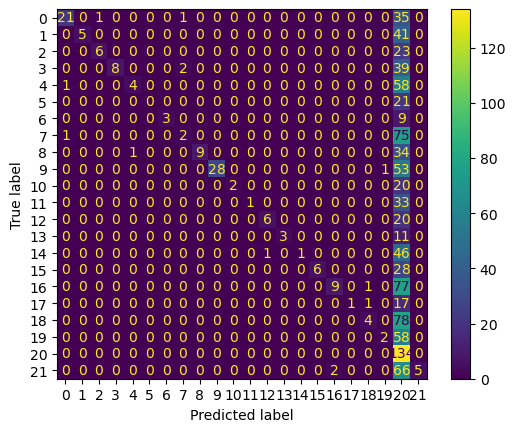

------TEST (Sigmoid)------
ACCURACY: 0.1827956989247312
RECALL: 0.1827956989247312
PRECISION: 0.3664210805787867


c:\anaconda\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


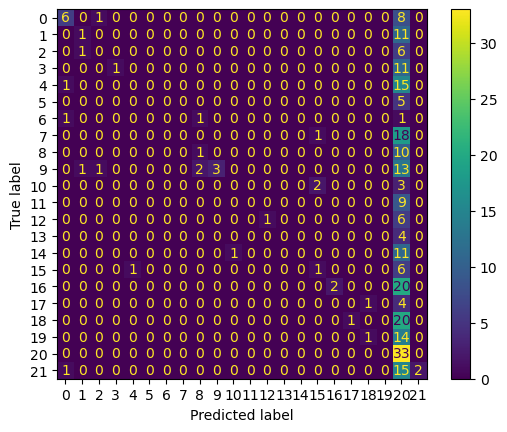

In [50]:
print("------TRAINING (Sigmoid)------")
confusion_plot(y_train,yp_train)
print("------TEST (Sigmoid)------")
confusion_plot(y_test,yp_test)

### Comparing Models

In [99]:
kernel_types = ['Linear', 'Gaussian', 'Sigmoid', 'Polynomial']

d = {"Kernels": kernel_types, "Training Accuracy": accuracy_training_l, "Test Accuracy": accuracy_test_l}
df = pd.DataFrame(d)
df = df.sort_values(by=["Test Accuracy"], ascending=False)

[Text(0, 0, 'Gaussian'),
 Text(1, 0, 'Linear'),
 Text(2, 0, 'Polynomial'),
 Text(3, 0, 'Sigmoid')]

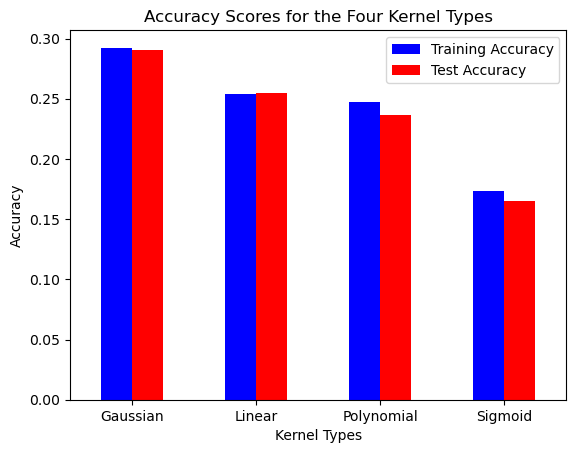

In [111]:
ax = df.plot(kind='bar', color=['b', 'r'])
plt.ylabel('Accuracy')
plt.xlabel('Kernel Types')
plt.title('Accuracy Scores for the Four Kernel Types')
plt.xticks(rotation = 0)
ax.set_xticklabels(df['Kernels'])